<a href="https://colab.research.google.com/github/hembasnet/Multilayer-percepton/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ast import increment_lineno
import random
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_iris
iris_data = load_iris()

In [2]:
iris_data = pd.read_csv('/content/Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**ABOUT IRIS FLOWER DATASET**

In [3]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

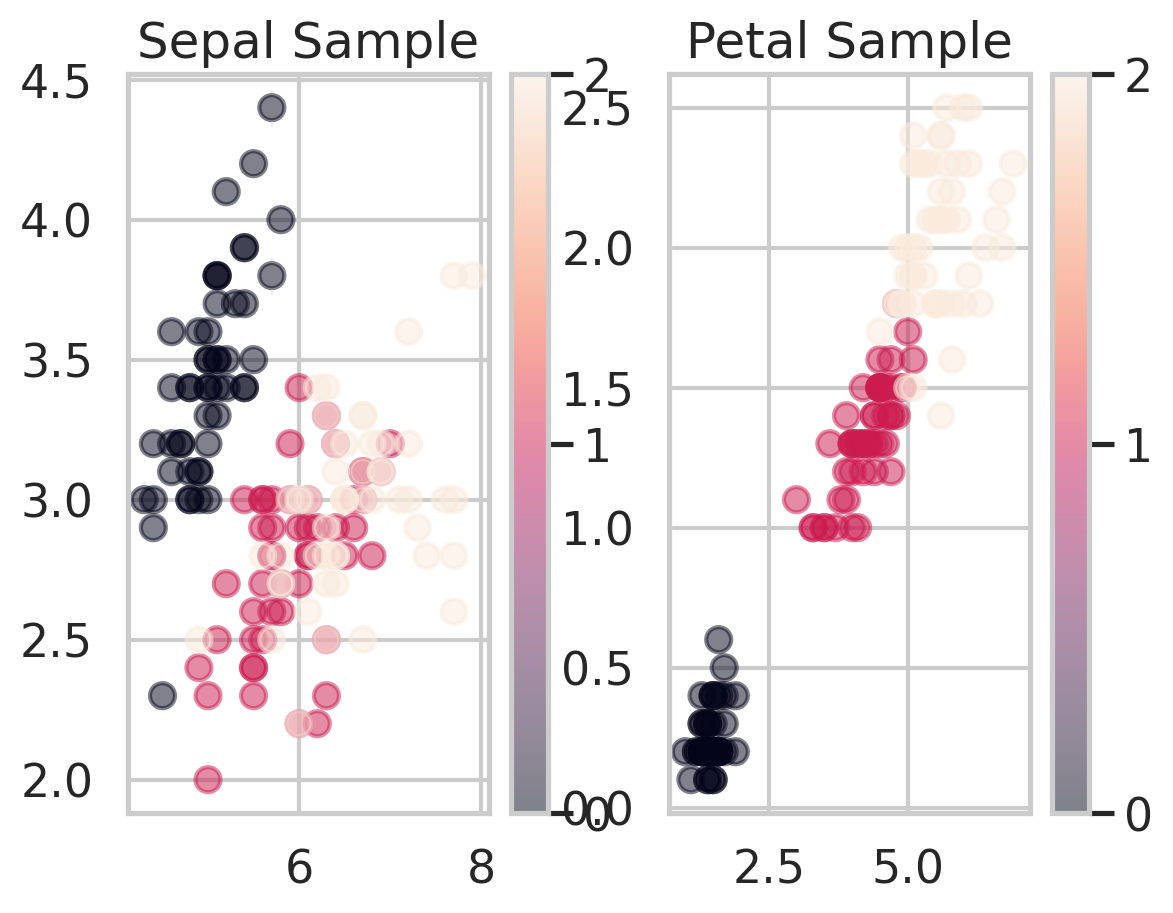

In [4]:
 n_features = iris_data.data.shape

plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(iris_data.data[:,0], iris_data.data[:,1], alpha=0.5, c=iris_data.target)
plt.colorbar(ticks=[0, 1, 2])
plt.title('Sepal Sample')

plt.subplot(1, 2, 2)
scatter_plot = plt.scatter(iris_data.data[:,2], iris_data.data[:, 3], alpha=0.5, c=iris_data.target)
plt.colorbar(ticks=[0, 1, 2])
plt.title('Petal Sample')
plt.show()

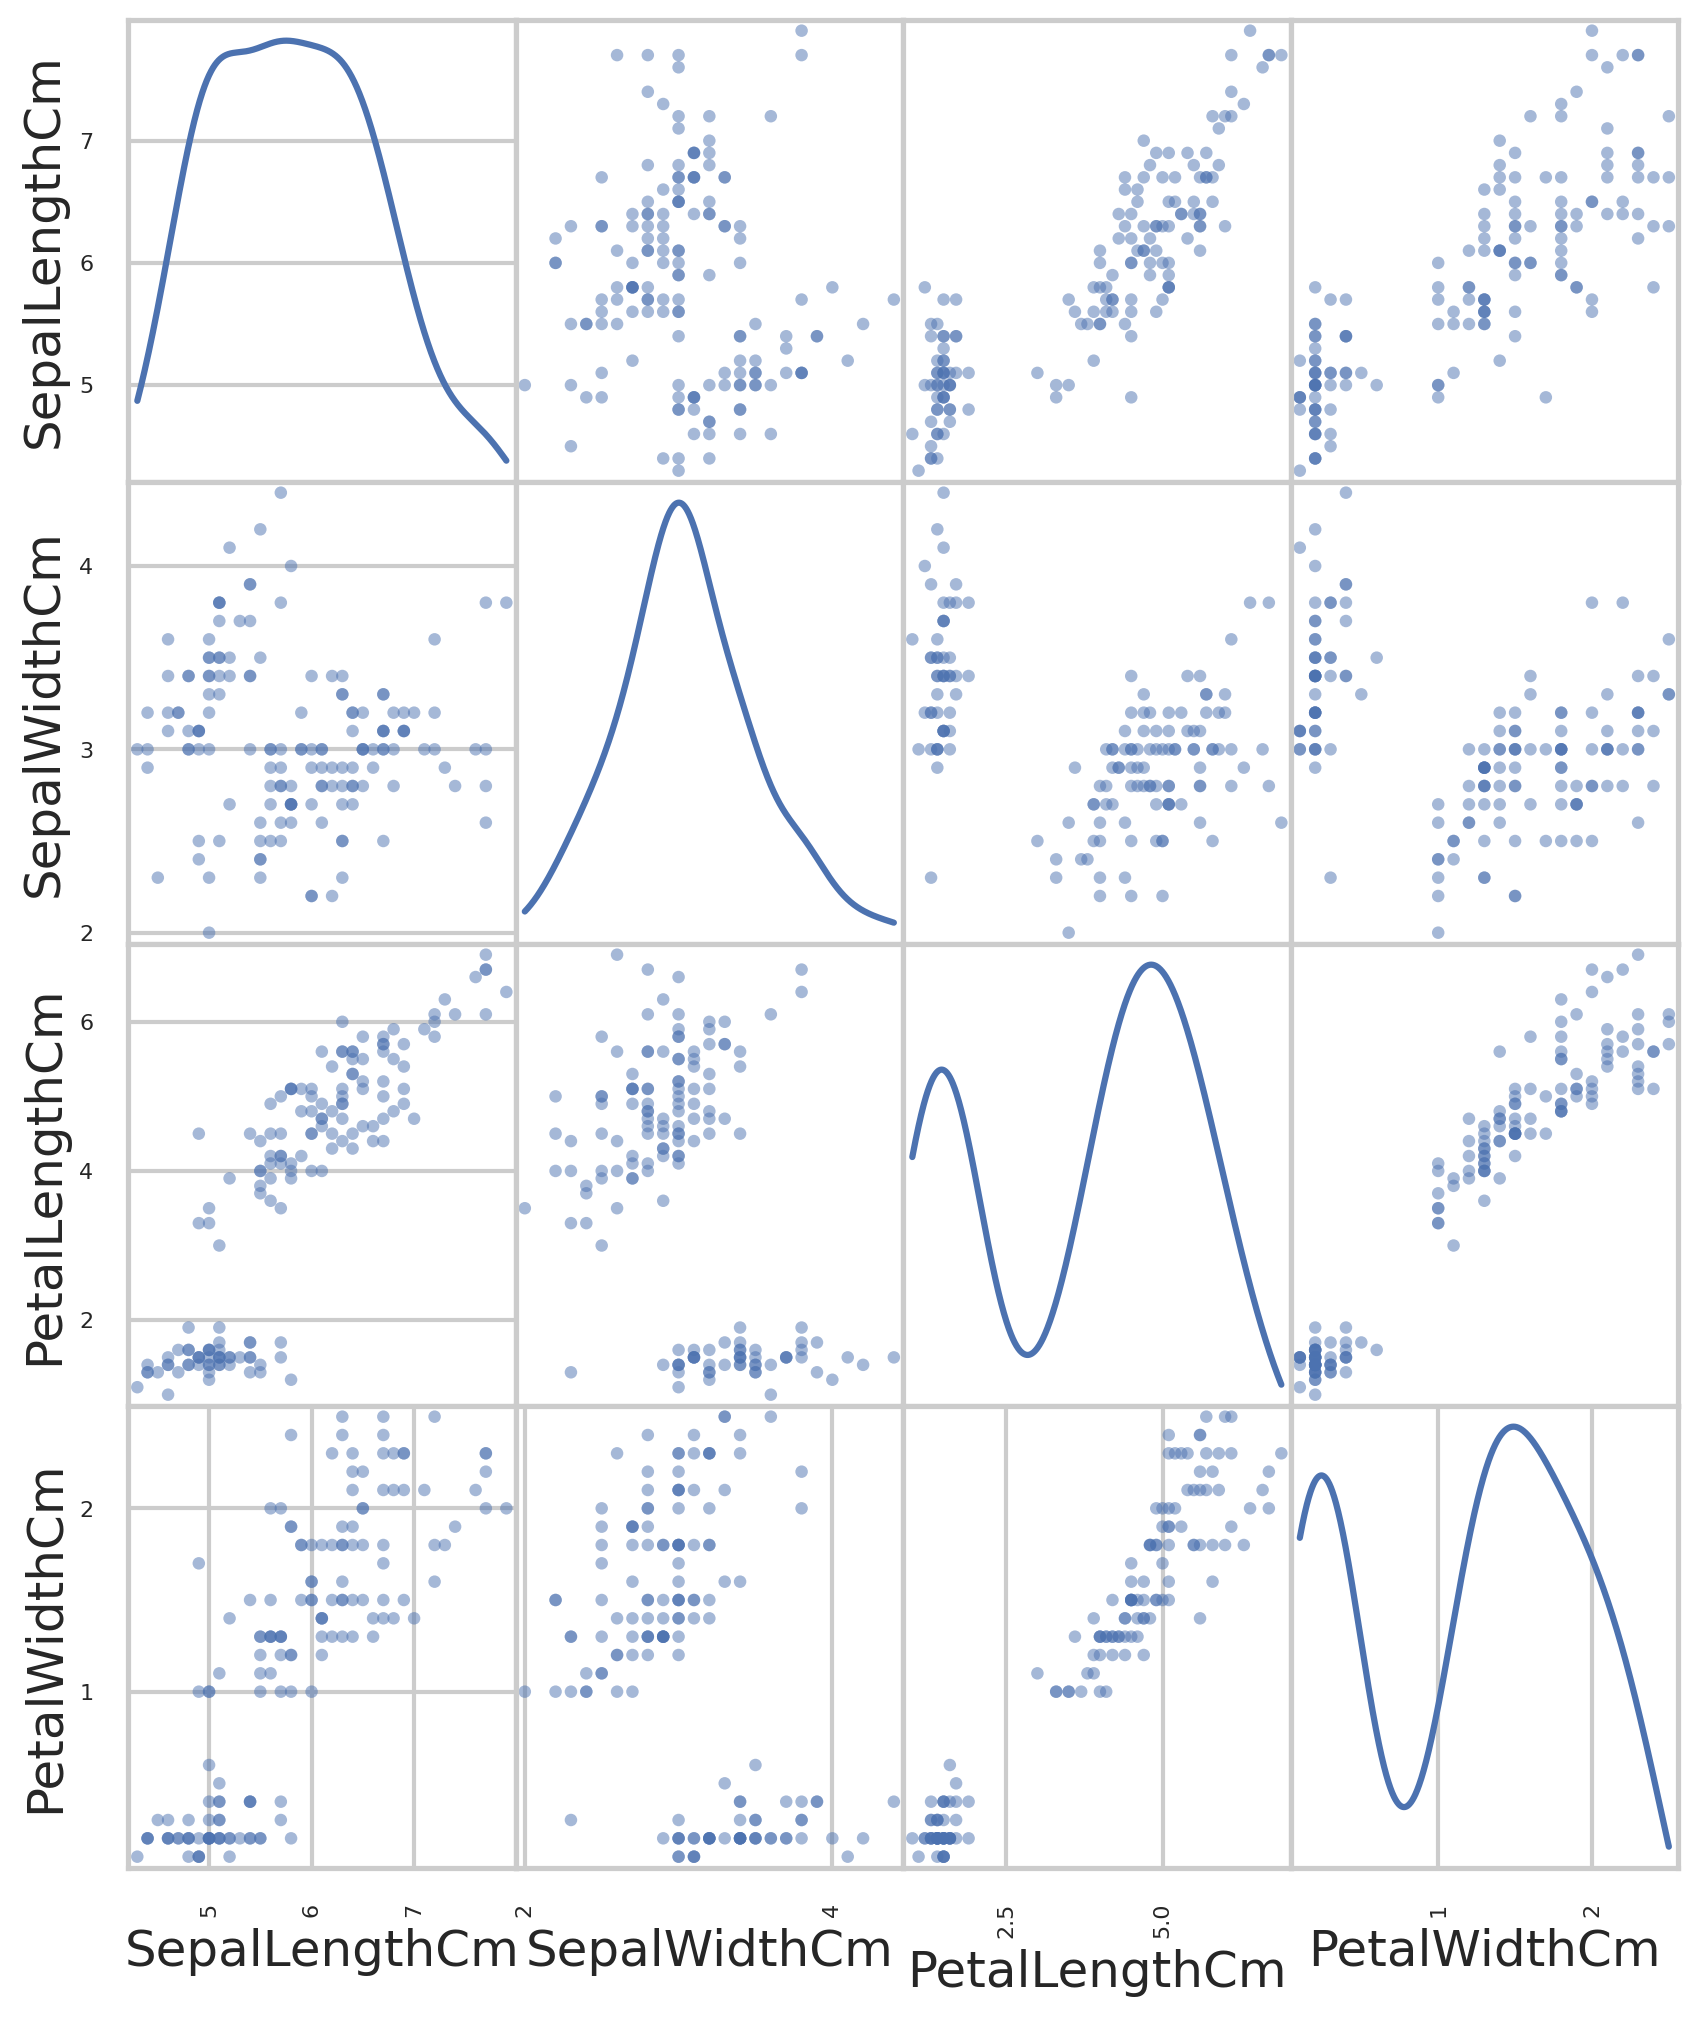

In [5]:
iris_data_df = pd.read_csv('/content/Iris.csv')
features = iris_data_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
scatter_matrix(features, alpha=0.5, figsize=(10, 12), diagonal='kde')
plt.show()

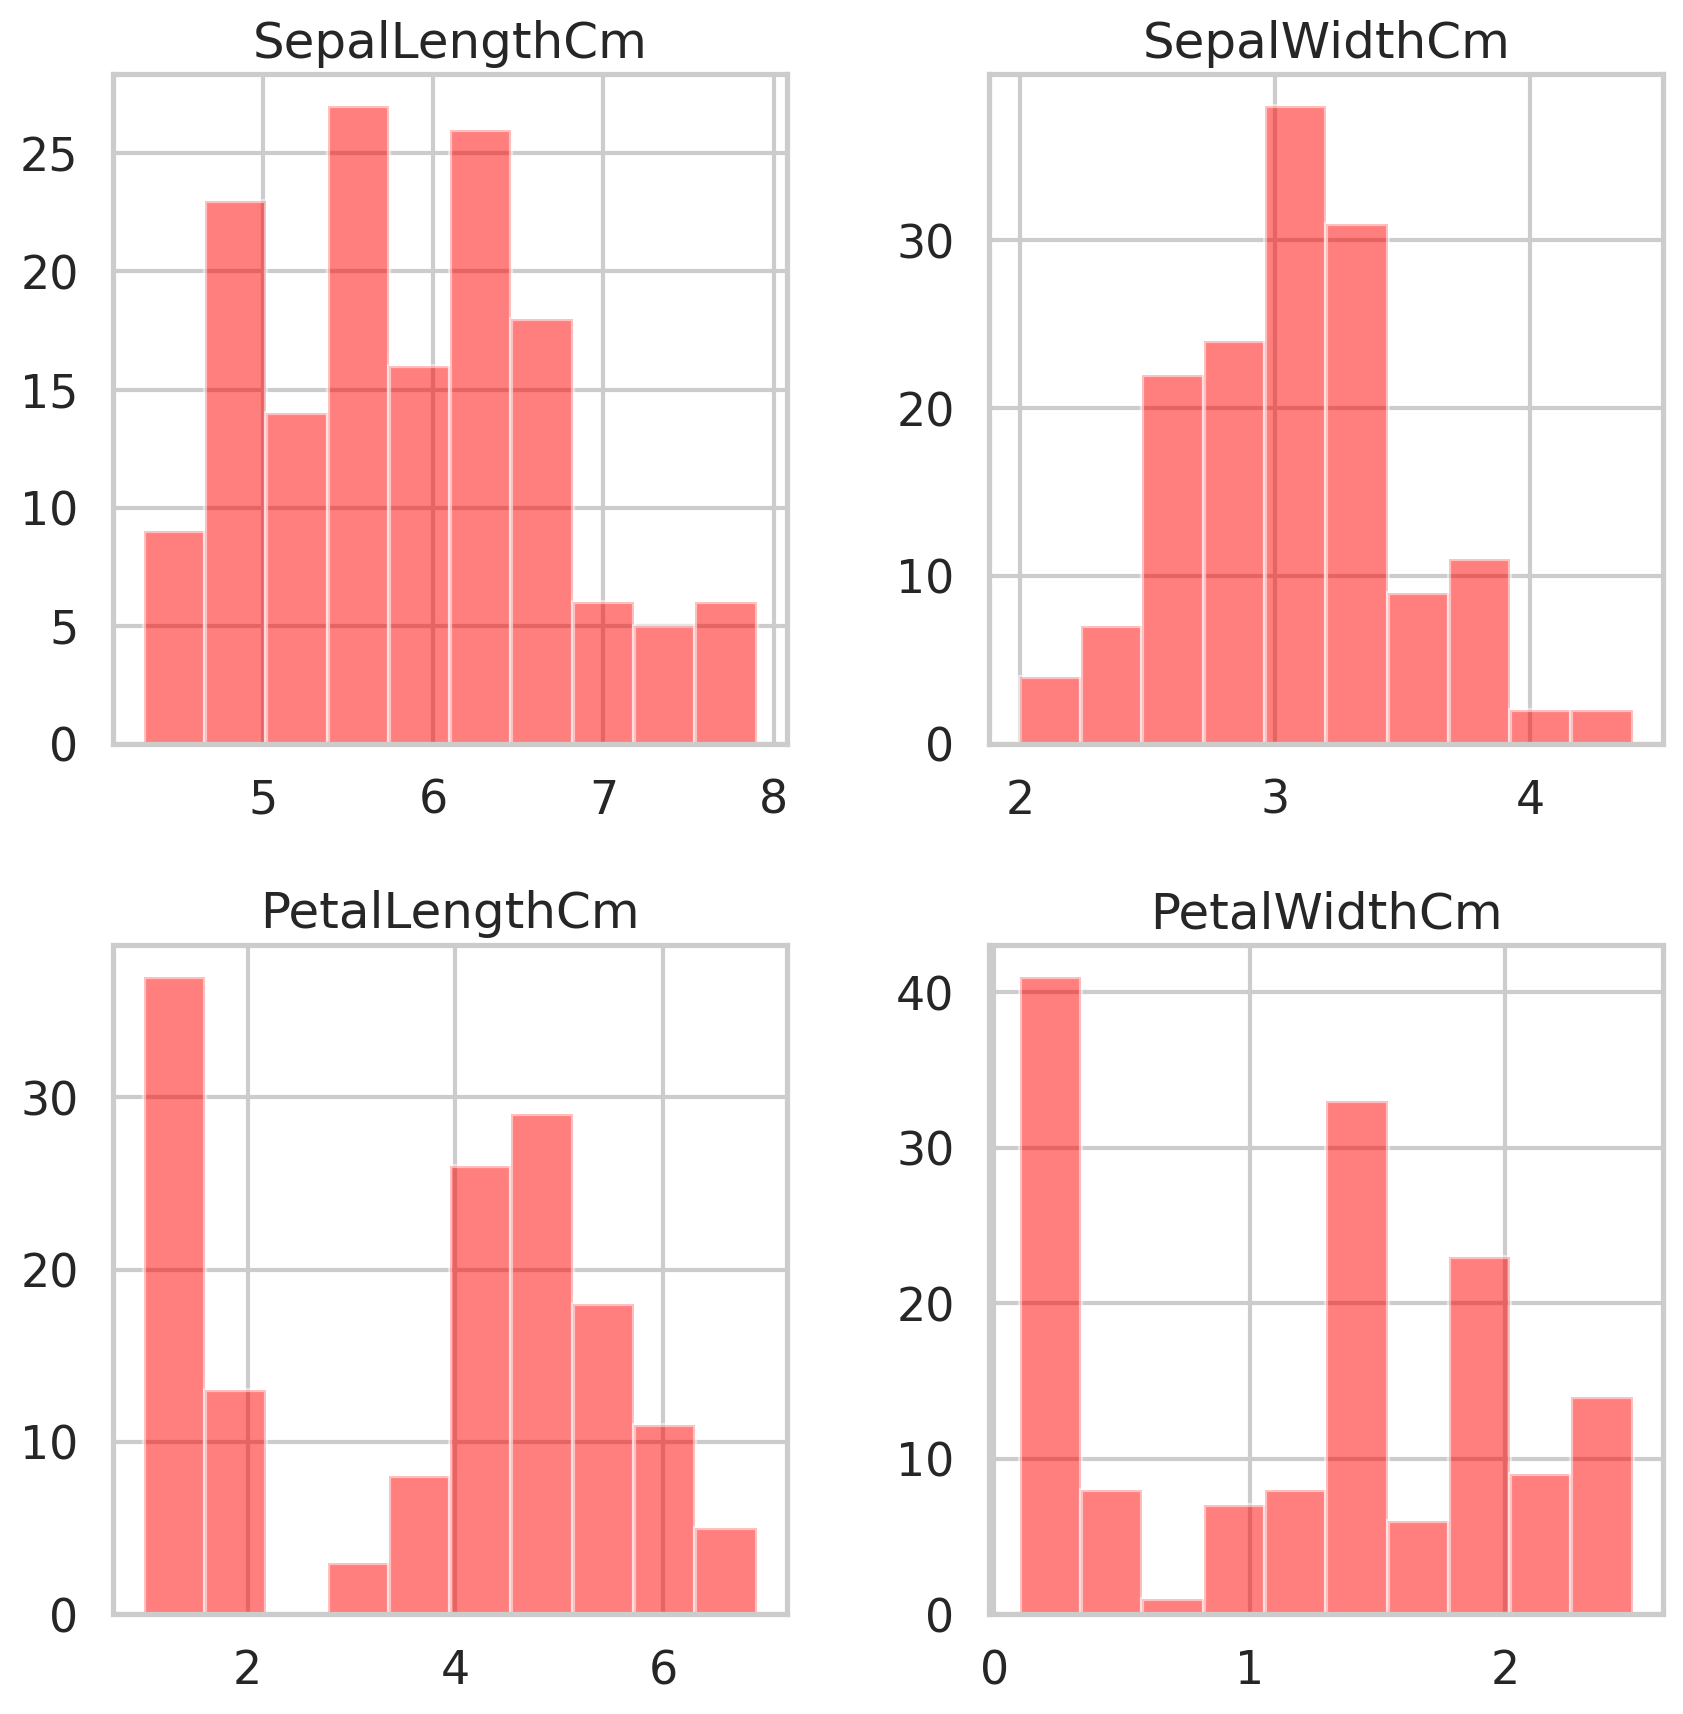

In [6]:

features.hist(alpha=0.5, figsize=(10, 10), color='red')

plt.show()

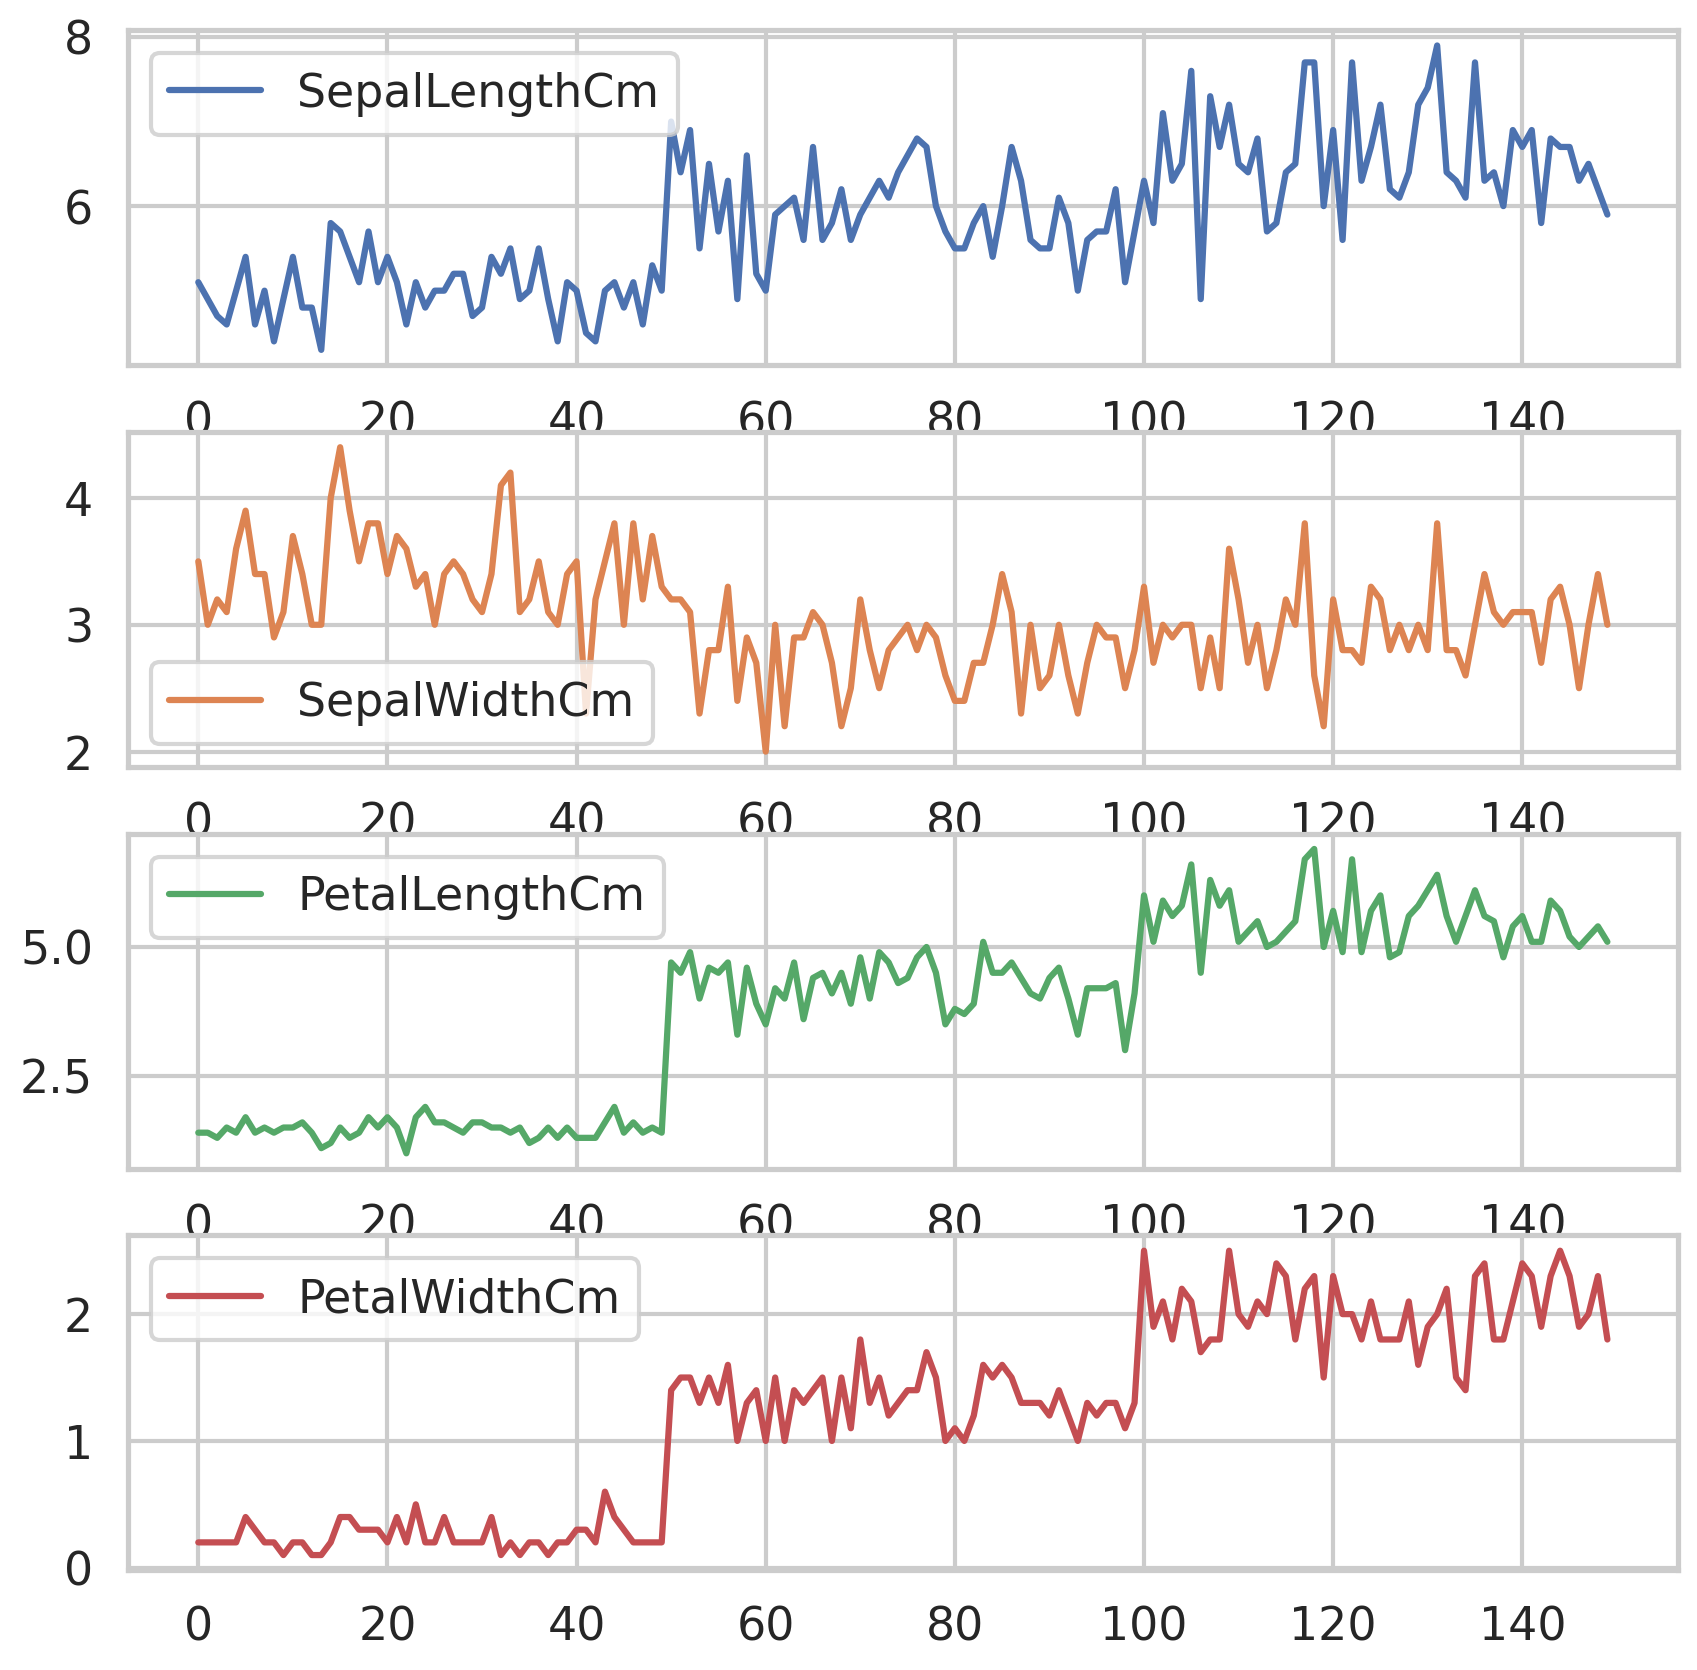

In [7]:
features.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

**MANUALLY SEPERATING OUR DATA SET**

In [8]:
import random
import numpy as np

random.seed(123)

def seperate_data():
  # Check if iris_data is a pandas DataFrame and convert to numpy array if necessary
  if isinstance(iris_data, pd.DataFrame):
    iris_dataset = iris_data.values
  else:
    iris_dataset = np.column_stack((iris_data.data, iris_data.target.T))

  # Ensure iris_dataset is a list before shuffling
  iris_dataset_list = list(iris_dataset)
  random.shuffle(iris_dataset_list)

  # Splitting the data based on the original structure of 50 instances per class
  A = iris_dataset_list[0:40]
  tA = iris_dataset_list[40:50]
  B = iris_dataset_list[50:90]
  tB = iris_dataset_list[90:100]
  C = iris_dataset_list[100:140]
  tC = iris_dataset_list[140:150]

  train = np.concatenate((A,B,C))
  test = np.concatenate((tA,tB,tC))

  return train,test

# The rest of the code should be outside the function definition
Filetrain, Filetest = seperate_data()
train_x = np.array([i[:4] for i in Filetrain])
train_y = np.array([i[4] for i in Filetrain])
test_x = np.array([i[:4] for i in Filetest])
test_y = np.array([i[4] for i in Filetest ])

**Plotting The Training Sample**

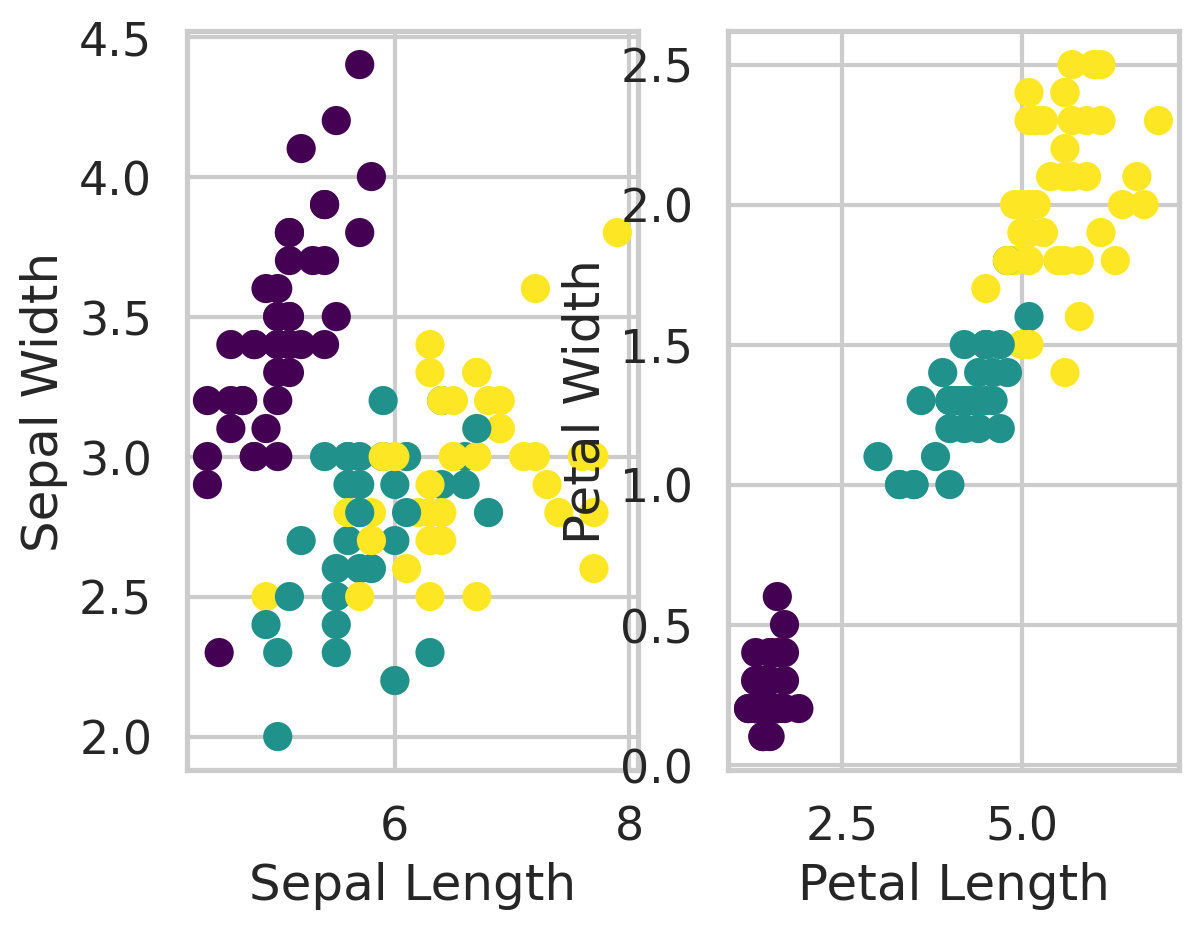

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.subplot(1, 2, 1)
plt.scatter(train_x[:,0],train_x[:,1],c=train_y,cmap=cm.viridis)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1, 2, 2)
plt.scatter(train_x[:,2],train_x[:, 3],c=train_y,cmap=cm.viridis)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

**PLot The Test Sample**

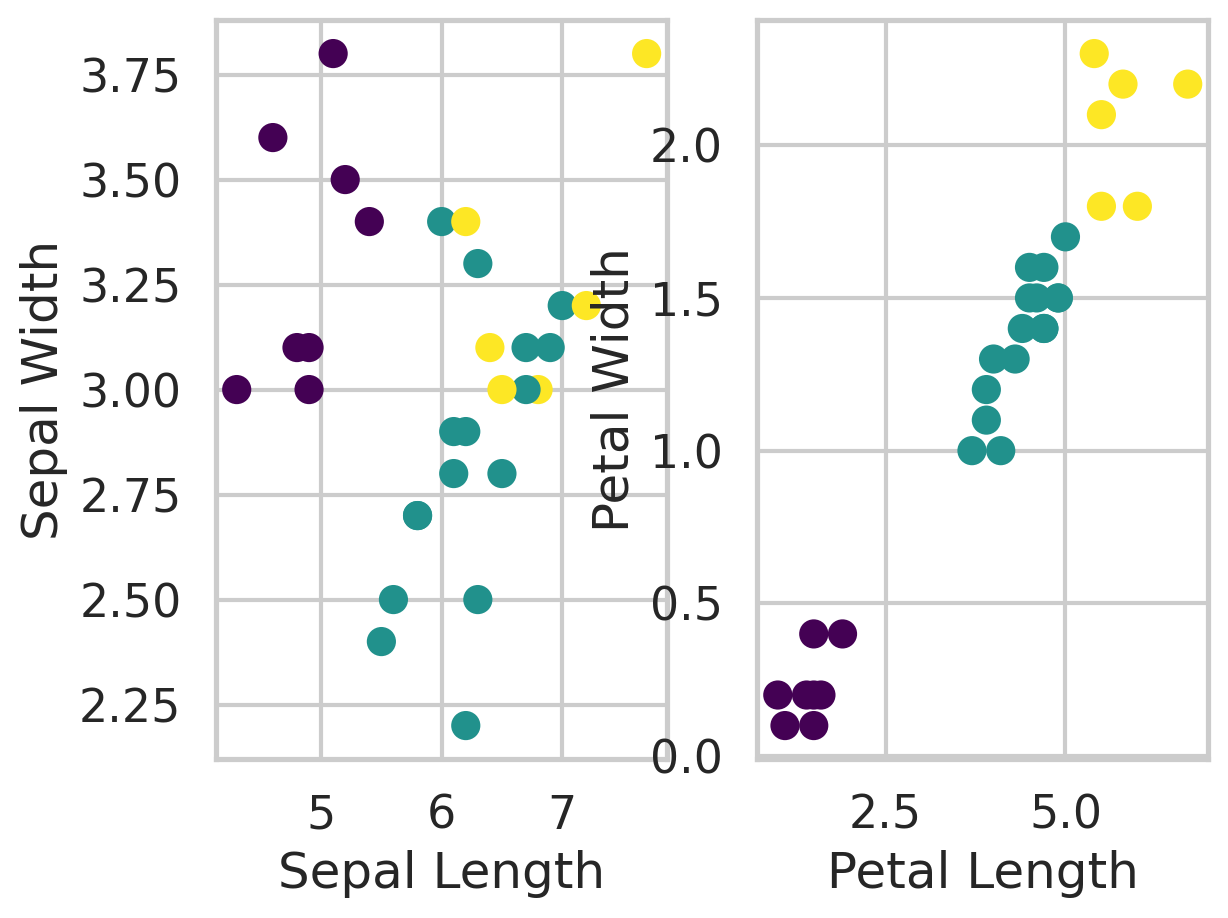

In [10]:
plt.subplot(1, 2, 1)
plt.scatter(test_x[:,0],test_x[:,1],c=test_y,cmap=cm.viridis)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1, 2, 2)
plt.scatter(test_x[:,2],test_x[:,3],c=test_y,cmap=cm.viridis)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


**IMLEMENTATION OF MULTI LAYER PERCEPTRON**

In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

class MultiLayerPerceptron():
    def __init__(self, config=None):
        if (config == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = config['InputLayer']
            self.hiddenLayer = config['HiddenLayer']
            self.OutputLayer = config['OutputLayer']
            self.learningRate = config['LearningRate']
            self.max_epochs = config['Epocas']
            self.BiasHiddenValue = config['BiasHiddenValue']
            self.BiasOutputValue = config['BiasOutputValue']
            self.activation = self.ativacao[config['ActivationFunction']]
            self.deriv = self.derivada[config['ActivationFunction']]

        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3

    pass

    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }

    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))

        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])

        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)

        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])

    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def fit(self, X, y):
        count_epoch = 1
        total_error = 0
        n = len(X);
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X):
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0):
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}

                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error

                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)

            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)

            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)


            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)

        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()

        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self

**FINDING THE BEST PARAMETERS**

In [14]:
def show_test():
    ep1 = [0, 100, 200, 300, 400, 500 ,600, 700, 800, 900, 1000, 1500, 2000]
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]

    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7]

    plt.figure(figsize=(10, 4))
    l1, = plt.plot(ep1, h_3, "--", color='b',label="nodel-3", marker=11)
    l2, = plt.plot(ep1, h_4, "--", color='r',label="nodel-4", marker=11)
    l3, = plt.plot(ep1, h_5, "--", color='g',label="nodel-5", marker=11)

    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("number of Epochs")
    plt.ylabel("% Hits")
    plt.title("Number of Hidden Layers - Performance")

    ep2 = [0,100,200,300,400,500,600,700]
    tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121]
    plt.figure(figsize=(10,4))
    l1 , = plt.plot(ep2, tanh, "--",color='b',label="Hyperbolic Tangent",marker=11)
    l2 , = plt.plot(ep2, sigm, "--",color='g',label="Sigmoide", marker=8)
    l3 , = plt.plot(ep2, Relu, "--",color='r',label="ReLu", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Activation Functions - Performance")

    fig, ax = plt.subplots()
    names = ["Hyperbolic Tangent","Sigmoide","ReLU"]
    x1 = [2.0,4.0,6.0]
    plt.bar(x1[0], 53.4,0.4,color='b')
    plt.bar(x1[1], 96.7,0.4,color='g')
    plt.bar(x1[2], 33.2,0.4,color='r')
    plt.xticks(x1,names)
    plt.ylabel('% Hits')
    plt.title('Hits - Activation Functions')
    plt.show()

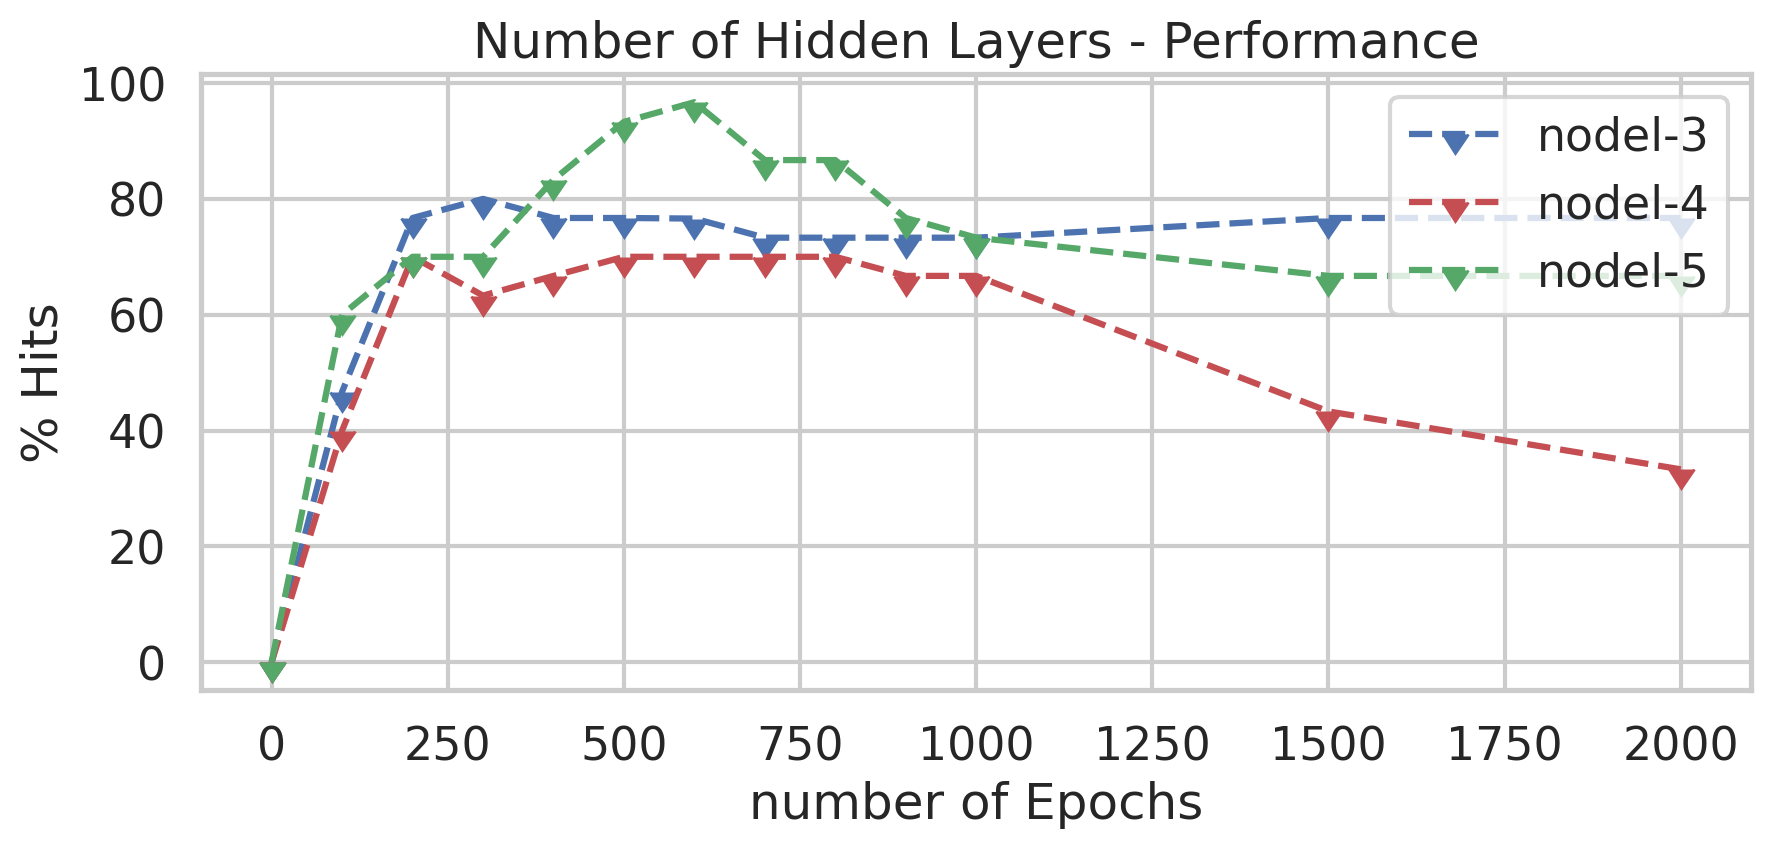

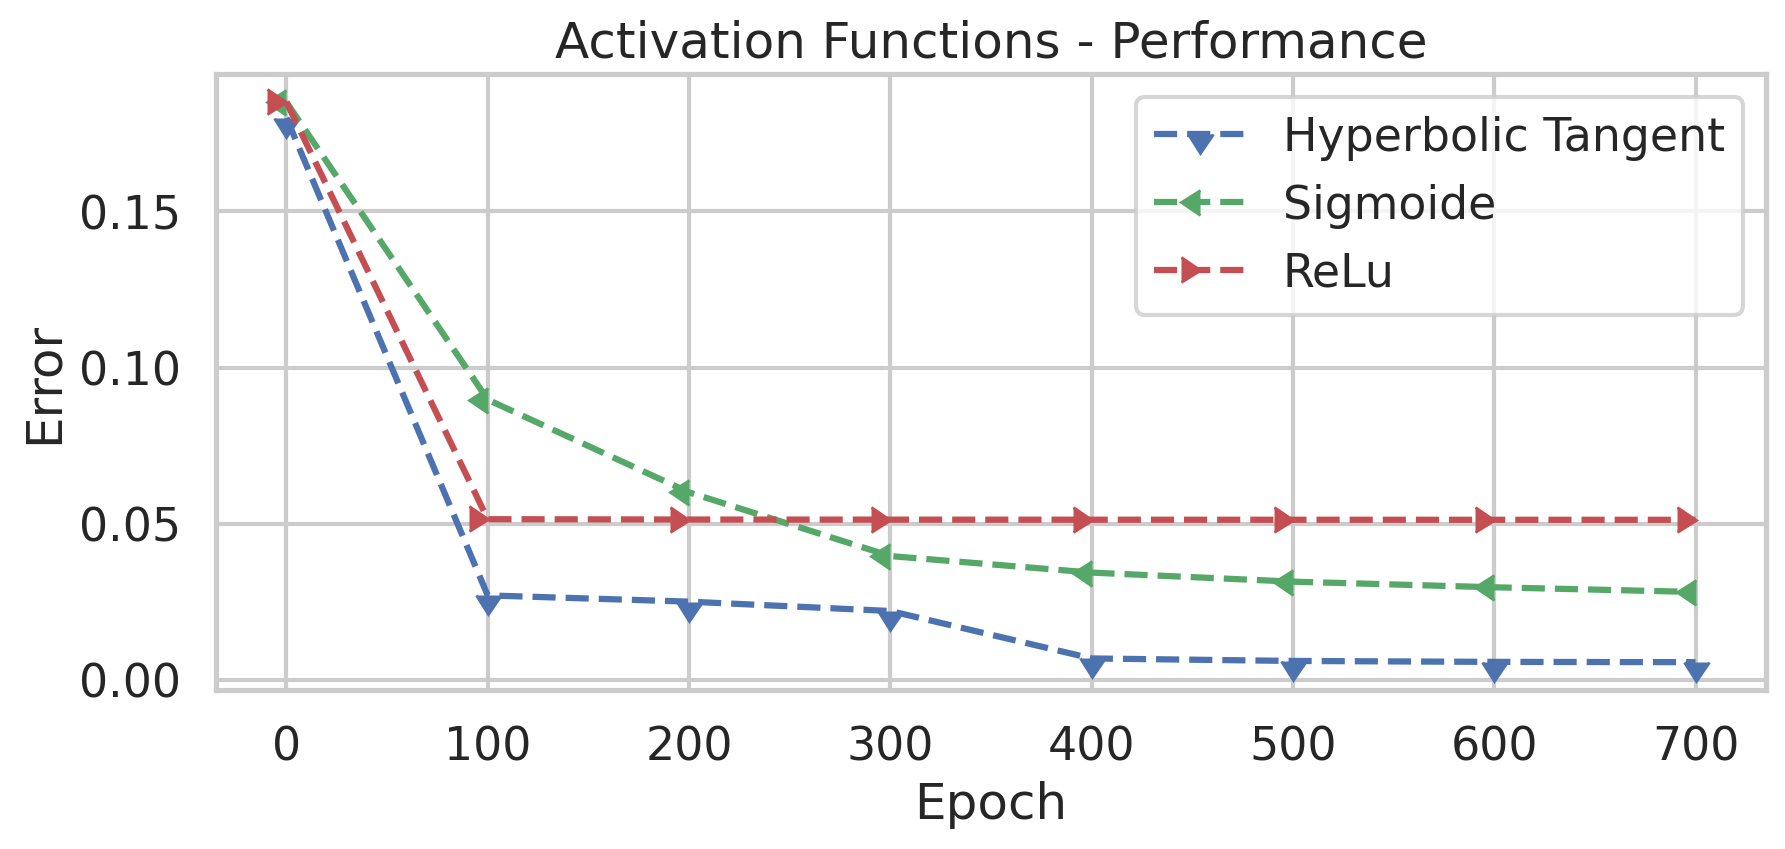

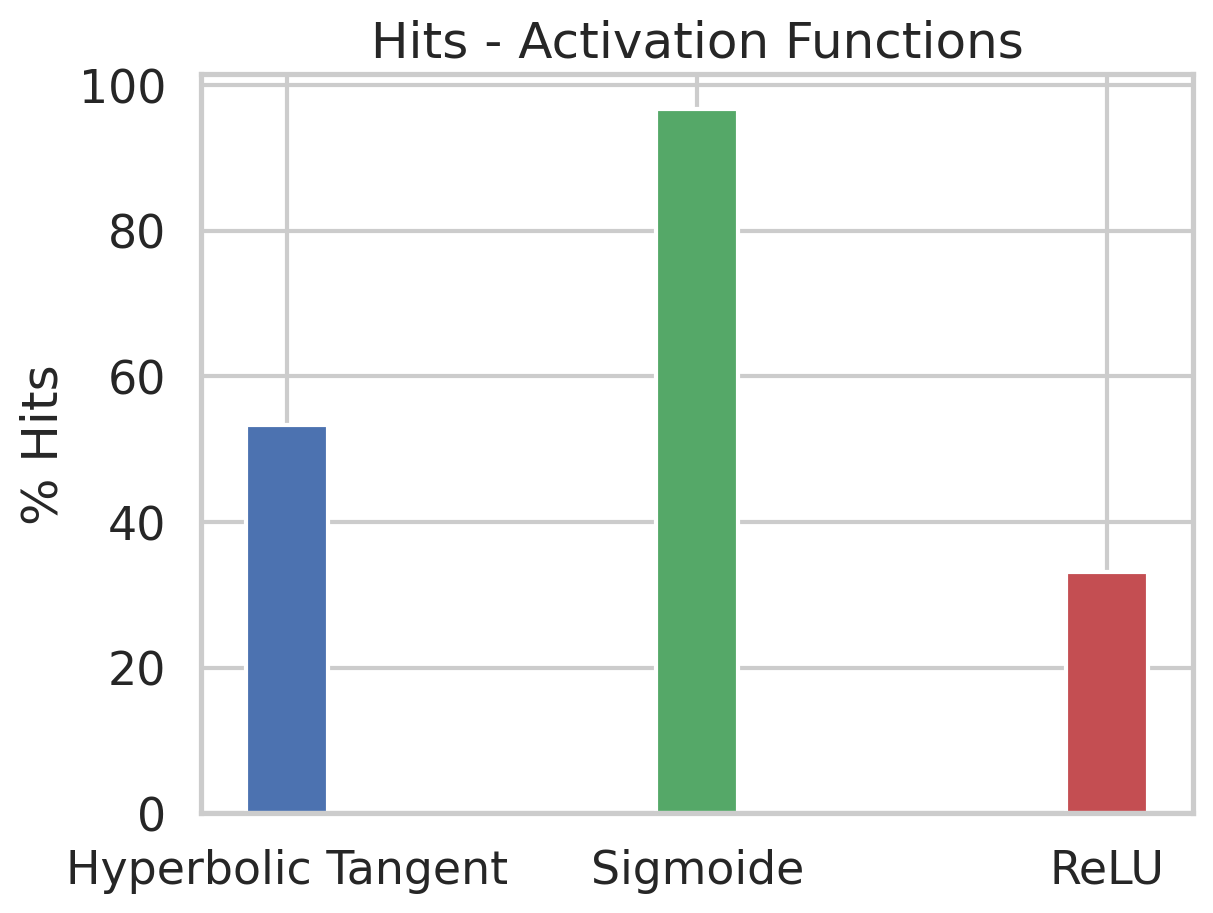

In [15]:
import matplotlib.pyplot as plt
show_test()

**TRAINING THE ARTIFICIAL NEURAL NETWORK**



Epoch  1 - Total Error:  0.07322263731927783
Epoch  50 - Total Error:  0.06361474921981773
Epoch  100 - Total Error:  0.04958591819355898
Epoch  150 - Total Error:  0.03667038647991166
Epoch  200 - Total Error:  0.031272480309141024
Epoch  250 - Total Error:  0.02910443231887442
Epoch  300 - Total Error:  0.02810403016591883
Epoch  350 - Total Error:  0.02757305383294254
Epoch  400 - Total Error:  0.0271440348966428
Epoch  450 - Total Error:  0.026567618812260014
Epoch  500 - Total Error:  0.025784740891140082
Epoch  550 - Total Error:  0.02482432899778609
Epoch  600 - Total Error:  0.023721106631651234
Epoch  650 - Total Error:  0.022507787691659852
Epoch  700 - Total Error:  0.02122012950704132


/tmp/ipython-input-1618657635.py:74: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


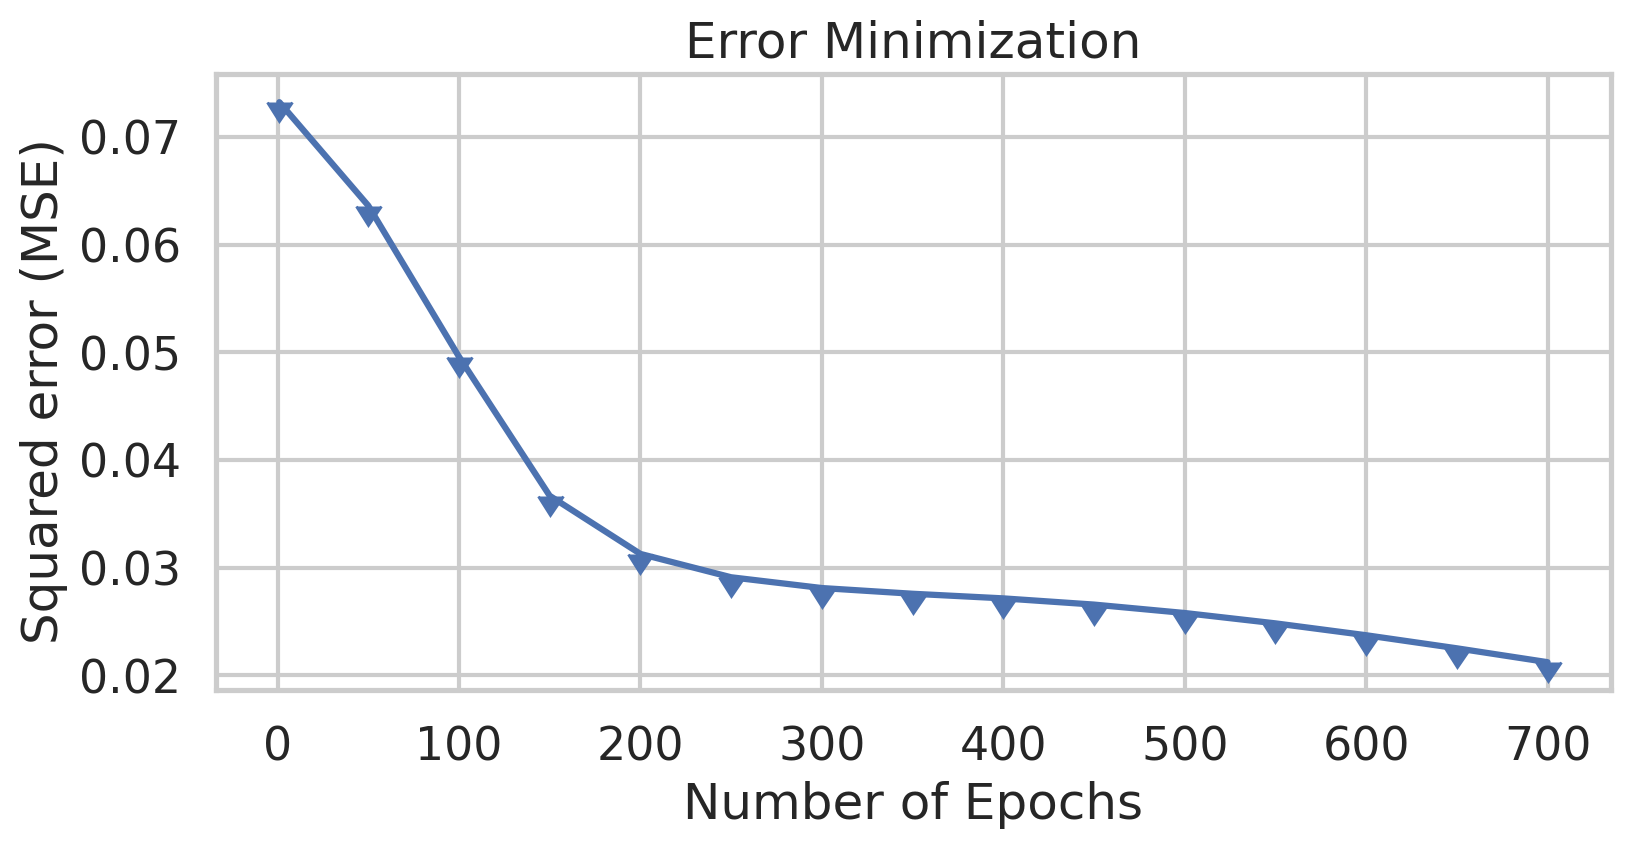

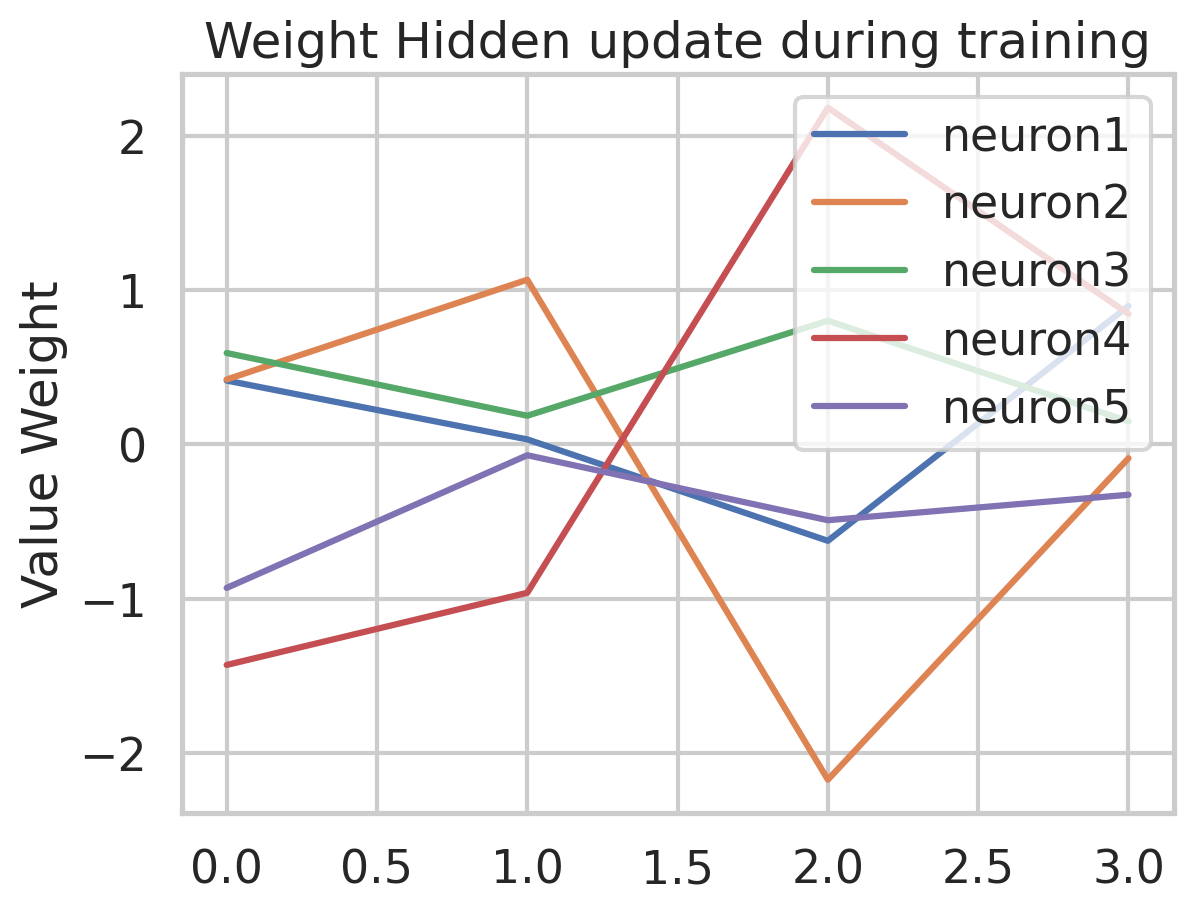

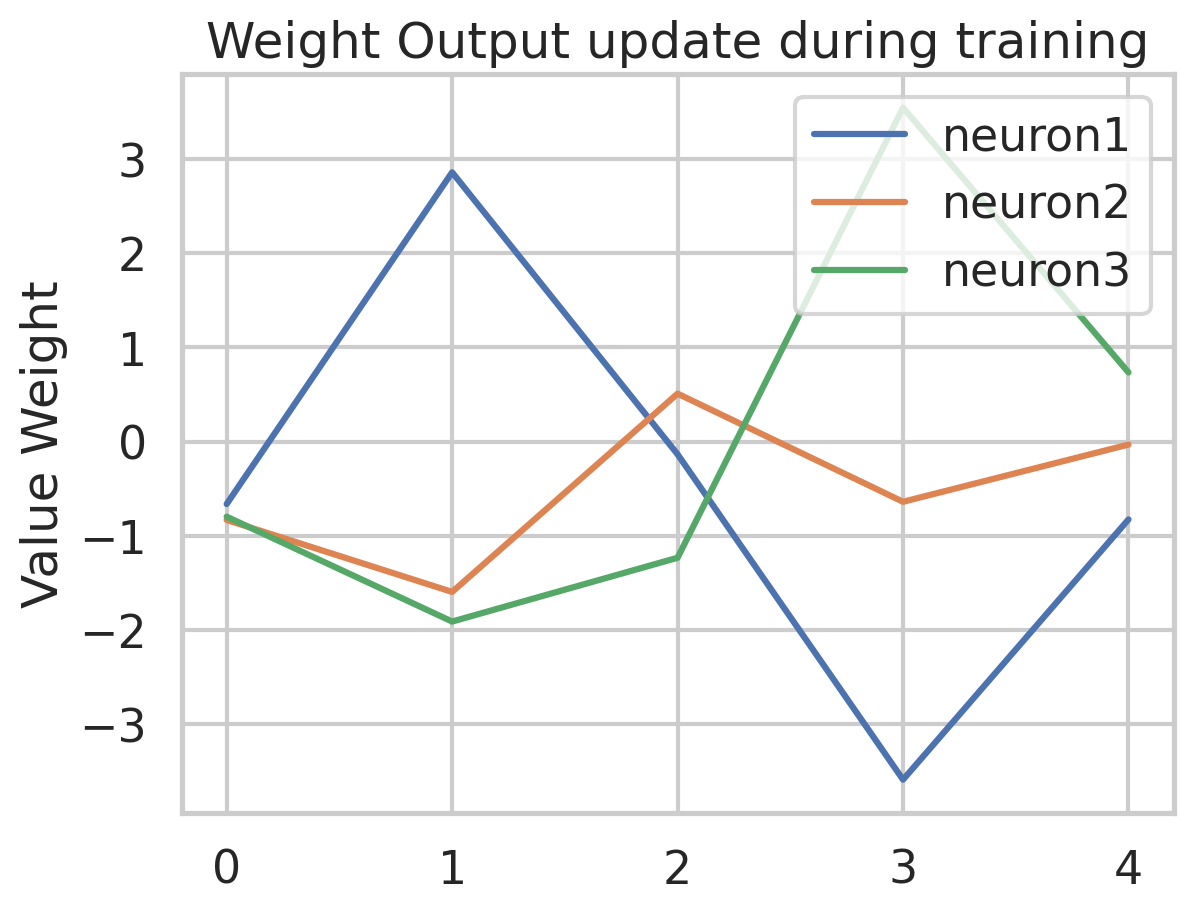

In [20]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':700, 'LearningRate':0.005,'BiasHiddenValue':-1,
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_x,train_y)

**TESTING THE RESULT**

In [27]:
prev = Perceptron.predict(test_x)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1

for i in range(len(test_y)):
    if test_y[i] == prev[i]:
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1

hits = (hits / len(test_y)) * 100
faults = 100 - hits

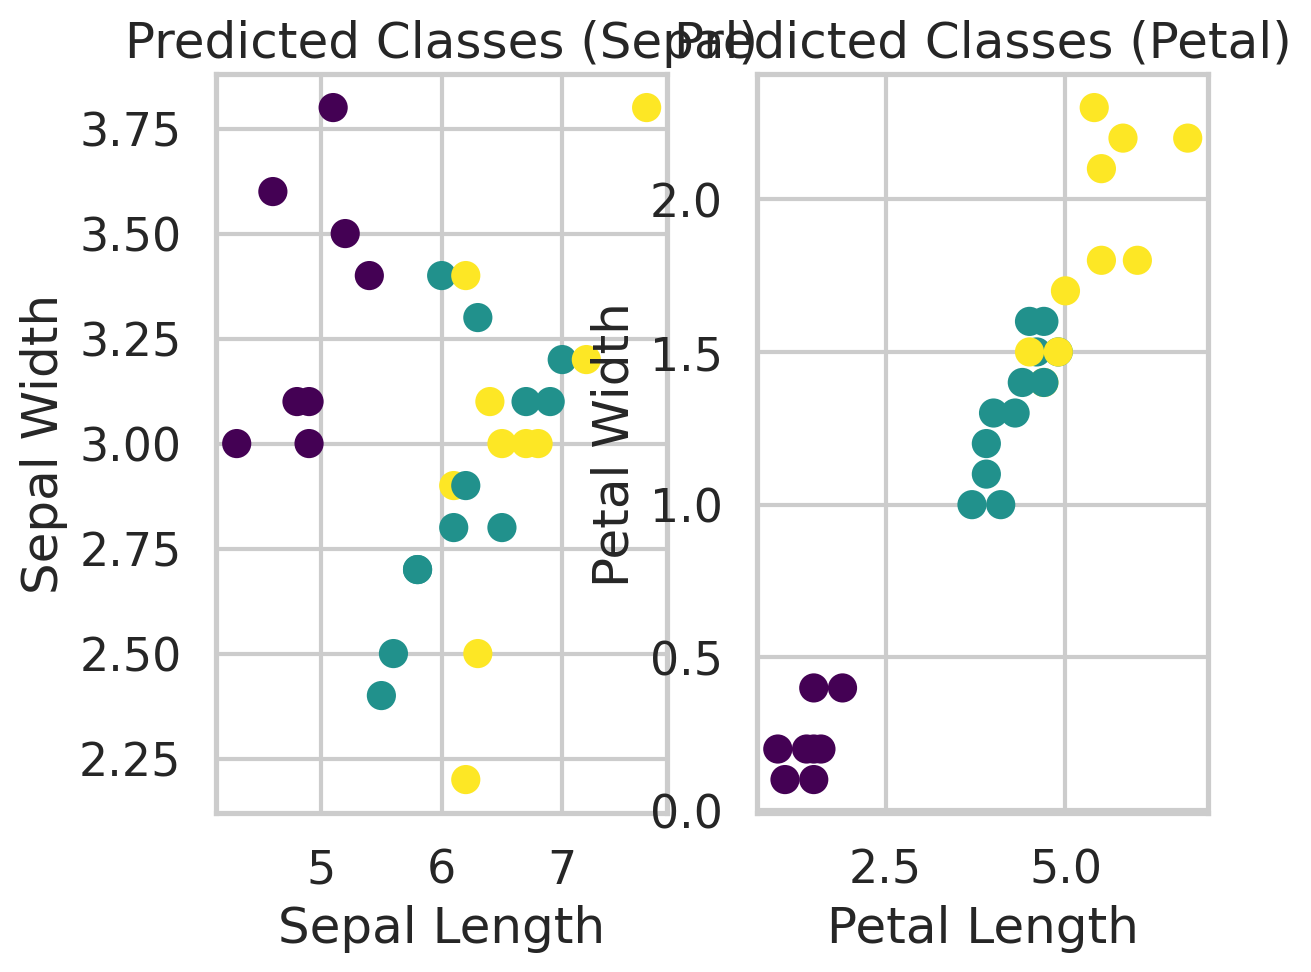

In [29]:
plt.subplot(1, 2, 1)
plt.scatter(test_x[:,0],test_x[:,1],c=predictions,cmap=cm.viridis)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Predicted Classes (Sepal)')

plt.subplot(1, 2, 2)
plt.scatter(test_x[:,2],test_x[:,3],c=predictions,cmap=cm.viridis)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Predicted Classes (Petal)')
plt.show()

**Accuracy and precision the Multilayer Perceptron**

Porcents : 86.67 % hits and 13.33 % faults
Total samples of test 30
*Iris-Setosa: 8 samples
*Iris-Versicolour: 16 samples
*Iris-Virginica: 6 samples


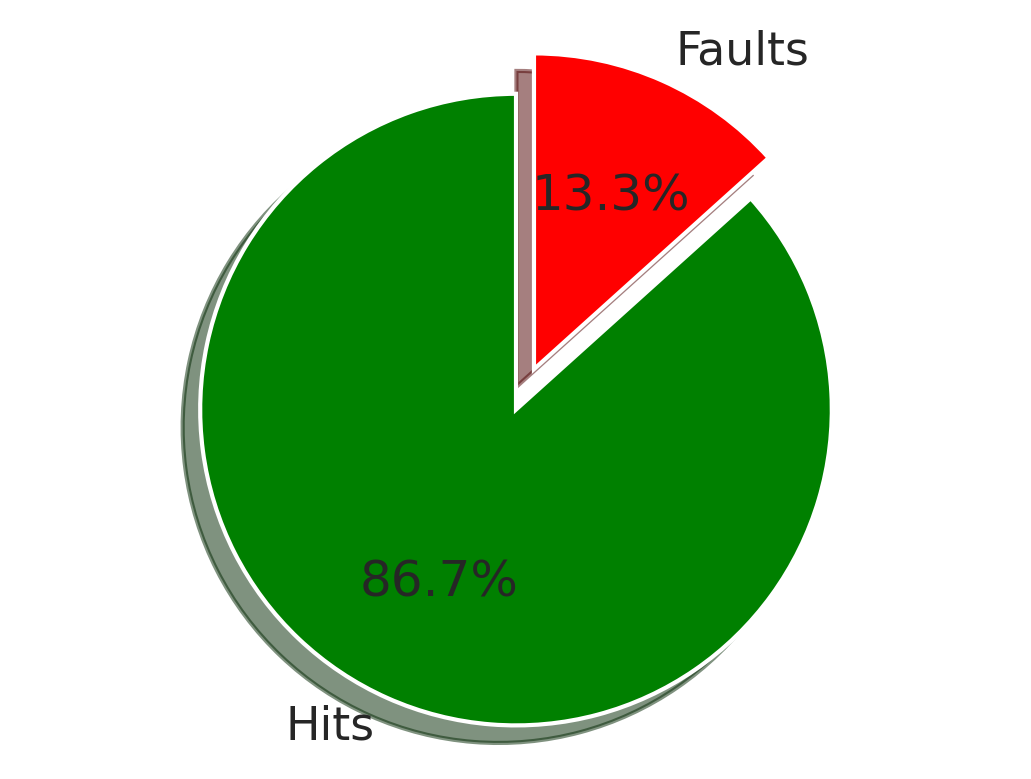

In [32]:
graph_hits = []
print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",len(test_y))
print("*Iris-Setosa:",n_set,"samples")
print("*Iris-Versicolour:",n_vers,"samples")
print("*Iris-Virginica:",n_virg,"samples")

graph_hits.append(hits)
graph_hits.append(faults)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits, explode=explode,colors=['green','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

**Score for each one of the samples**

- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 75.00 %
- Acurracy Iris-Virginica: 100.00 %


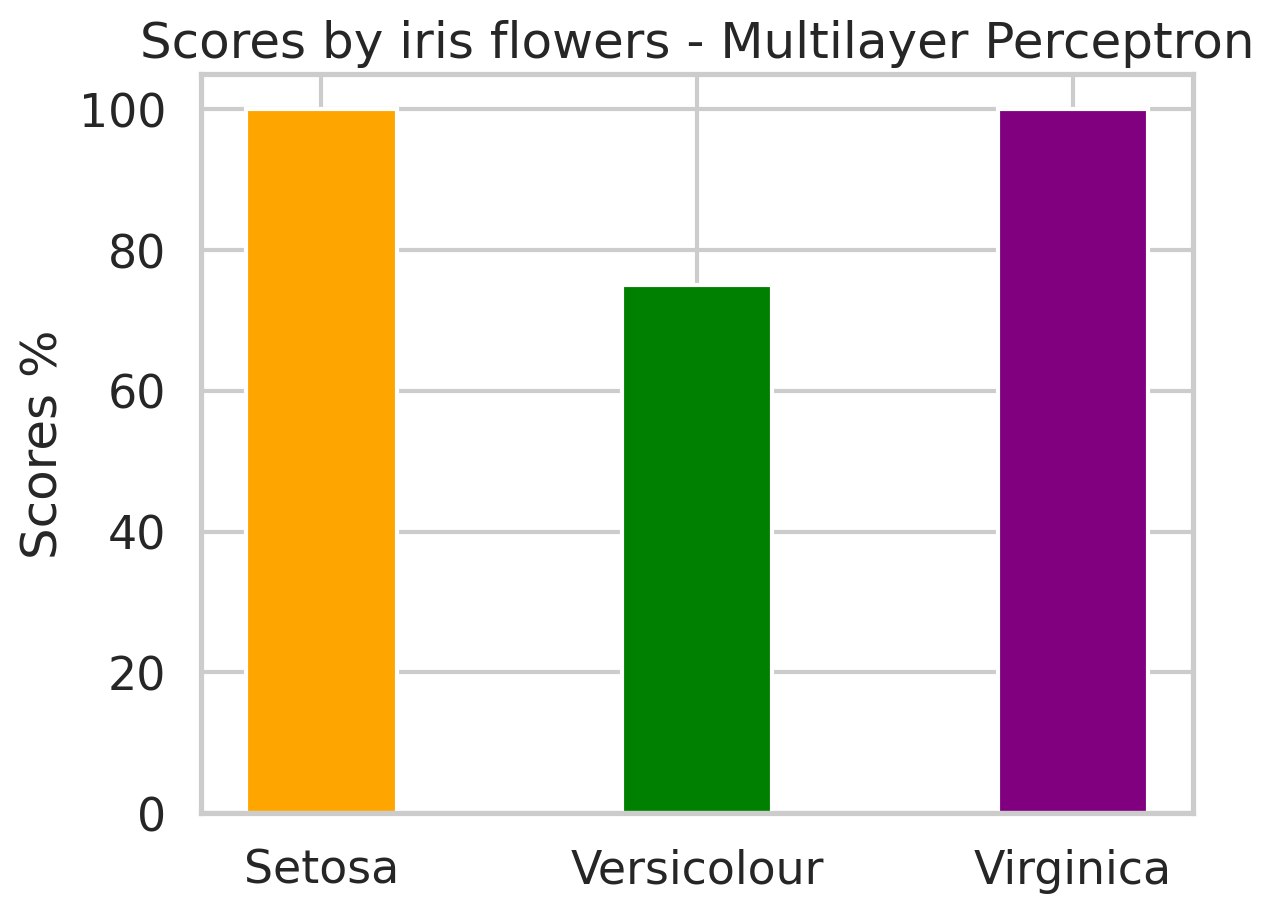

In [33]:
acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%acc_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%acc_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%acc_virg, "%")
names = ["Setosa","Versicolour","Virginica"]
x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_set,color='orange',label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers,color='green',label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg,color='purple',label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - Multilayer Perceptron')
plt.show()